# Exploratory analysis

A brief exploratory analysis example. 

## Library and color scale

In [26]:
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myGraphics.R")

loadlibrary("MASS")
loadlibrary("gclus")
loadlibrary("RColorBrewer")
loadlibrary("gridExtra")
loadlibrary("GGally")
loadlibrary("reshape")
loadlibrary("dplyr")
loadlibrary("WVPlots")
loadlibrary("aplpack")

col.set <- brewer.pal(11, 'Spectral')
mycolors <- col.set[c(1,3,5,7,9)]

plot_size(4, 3)

## Iris datasets
The exploratory analysis is done using iris dataset.


In [27]:
library("MASS")
data(iris)
t(sapply(iris, class))
iris[c(1:3,51:53,101:103),]

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
numeric,numeric,numeric,numeric,factor


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
51,7.0,3.2,4.7,1.4,versicolor
52,6.4,3.2,4.5,1.5,versicolor
53,6.9,3.1,4.9,1.5,versicolor
101,6.3,3.3,6.0,2.5,virginica
102,5.8,2.7,5.1,1.9,virginica
103,7.1,3.0,5.9,2.1,virginica


### Data Summary
A preliminary analysis using the $Sepal.Length$ attribute. This should be done for all attributes. 

In [28]:
sum <-summary(iris$Sepal.Length)
exp_table(t(sum), c("Statistics", "Freq") , proj=1)
IQR <- sum["3rd Qu."]-sum["1st Qu."]
print(sprintf("IQR=%.1f", IQR))

Statistics,Freq
Min.,4.300000
1st Qu.,5.100000
Median,5.800000
Mean,5.843333
3rd Qu.,6.400000
Max.,7.900000


[1] "IQR=1.3"


## Histogram analysis

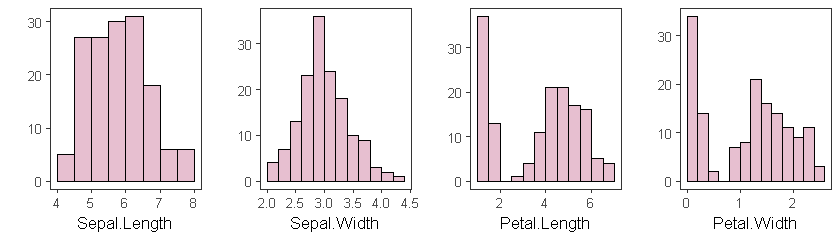

In [29]:
grfA <- plot.hist(iris %>% select(variable="Sepal.Length", value=Sepal.Length), label_x ="Sepal.Length", color=mycolors[1])
grfB <- plot.hist(iris %>% select(variable="Sepal.Width", value=Sepal.Width), label_x ="Sepal.Width", color=mycolors[1])
grfC <- plot.hist(iris %>% select(variable="Petal.Length", value=Petal.Length), label_x ="Petal.Length", color=mycolors[1])
grfD <- plot.hist(iris %>% select(variable="Petal.Width", value=Petal.Width), label_x ="Petal.Width", color=mycolors[1])

plot_size(7, 2)
grid.arrange(grfA, grfB, grfC, grfD, ncol=4, nrow=1)
plot_size(4, 3)

## Density distribution

Using Species as id variables


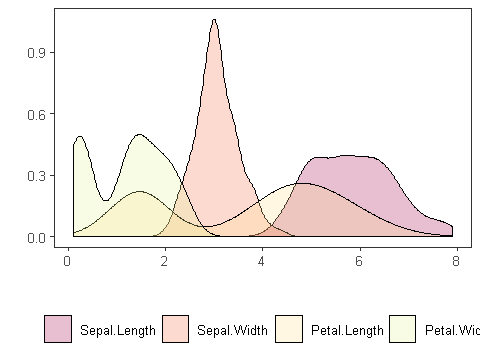

In [30]:
data <- melt(iris)
grfA <- plot.density(data, colors=mycolors[1:4])
plot(grfA)

## Density distribution colored by the classifier

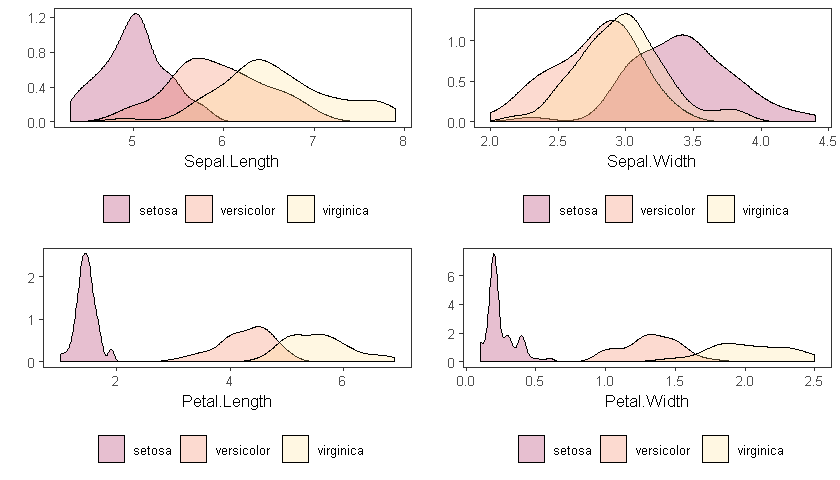

In [32]:
grfA <- plot.density(iris %>% select(variable=Species, value=Sepal.Length), label_x = "Sepal.Length", color=mycolors[c(1:3)])
grfB <- plot.density(iris %>% select(variable=Species, value=Sepal.Width), label_x = "Sepal.Width", color=mycolors[c(1:3)])
grfC <- plot.density(iris %>% select(variable=Species, value=Petal.Length), label_x = "Petal.Length", color=mycolors[c(1:3)])
grfD <- plot.density(iris %>% select(variable=Species, value=Petal.Width), label_x = "Petal.Width", color=mycolors[c(1:3)])

plot_size(7, 4)
grid.arrange(grfA, grfB, grfC, grfD, ncol=2, nrow=2)
plot_size(4, 3)

## Box-plot analysis

Using Species as id variables


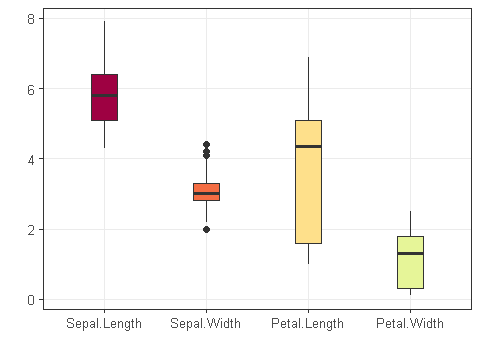

In [33]:
data <- melt(iris)
grfA <- plot.boxplot(data, colors=mycolors[1:4])
plot(grfA)

## Box-plot analysis grouped by the classifier

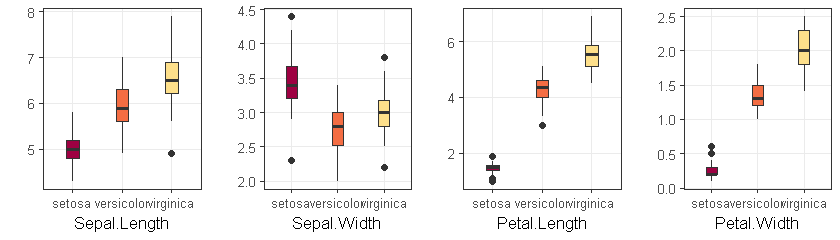

In [34]:
grfA <- plot.boxplot(iris %>% select(variable=Species, value=Sepal.Length), label_x = "Sepal.Length", color=mycolors[c(1:3)])
grfB <- plot.boxplot(iris %>% select(variable=Species, value=Sepal.Width), label_x = "Sepal.Width", color=mycolors[c(1:3)])
grfC <- plot.boxplot(iris %>% select(variable=Species, value=Petal.Length), label_x = "Petal.Length", color=mycolors[c(1:3)])
grfD <- plot.boxplot(iris %>% select(variable=Species, value=Petal.Width), label_x = "Petal.Width", color=mycolors[c(1:3)])

plot_size(7, 2)
grid.arrange(grfA, grfB, grfC, grfD, ncol=4, nrow=1)
plot_size(4, 3)

## Checking for normal distribution

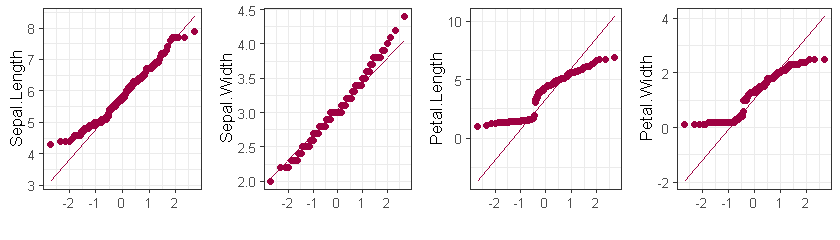

In [35]:
grfA <- exp_norm_dist(iris$Sepal.Length, label_y = "Sepal.Length", color=mycolors[1])
grfB <- exp_norm_dist(iris$Sepal.Width, label_y = "Sepal.Width", color=mycolors[1])
grfC <- exp_norm_dist(iris$Petal.Length, label_y = "Petal.Length", color=mycolors[1])
grfD <- exp_norm_dist(iris$Petal.Width, label_y = "Petal.Width", color=mycolors[1])

plot_size(7, 2)
grid.arrange(grfA, grfB, grfC, grfD, ncol=4, nrow=1)
plot_size(4, 3)

## Correlation matrix

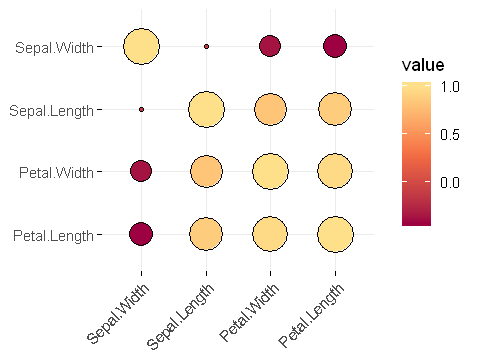

In [31]:
grf <- exp_correlation(iris[,1:4], color = mycolors[1:3]) 

plot(grf)

## Parallel coordinates

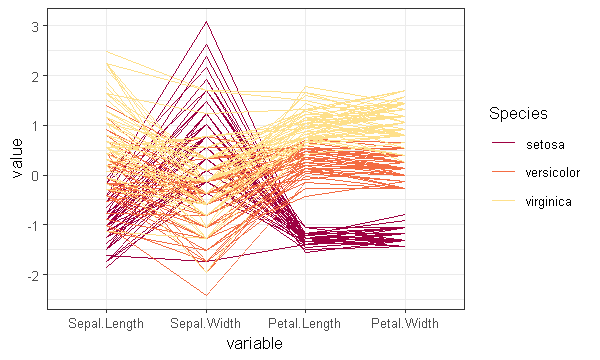

In [29]:
grf <- ggparcoord(data = iris, columns = c(1:4), group=5) + theme_bw(base_size = 10) + scale_color_manual(values=mycolors[1:3])

plot_size(5, 3)
plot(grf)
plot_size(4, 3)

## Matrix dispersion

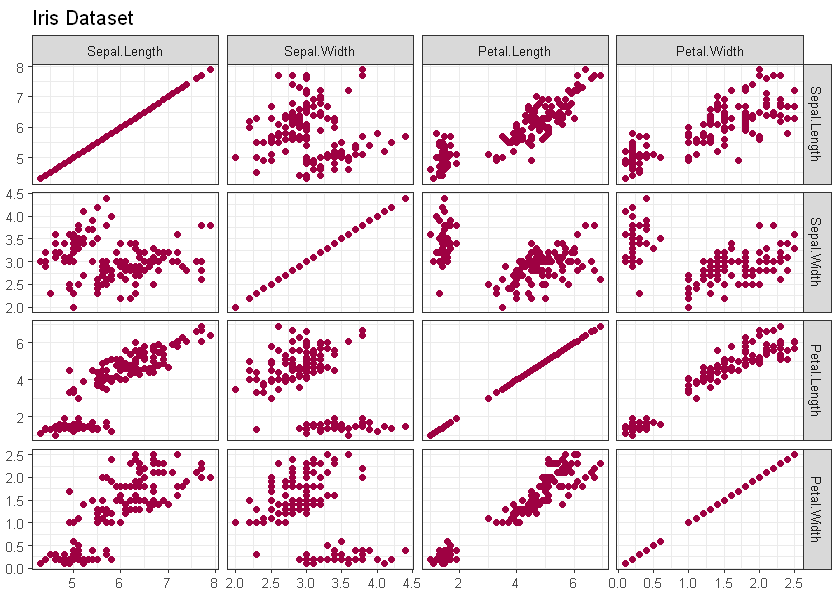

In [34]:
grf <- exp_pair_plot(data=iris, cnames=colnames(iris)[1:4], title="Iris", colors=mycolors[1])

plot_size(7, 5)
grf
plot_size(4, 3)

## Matrix dispersion by the classifier

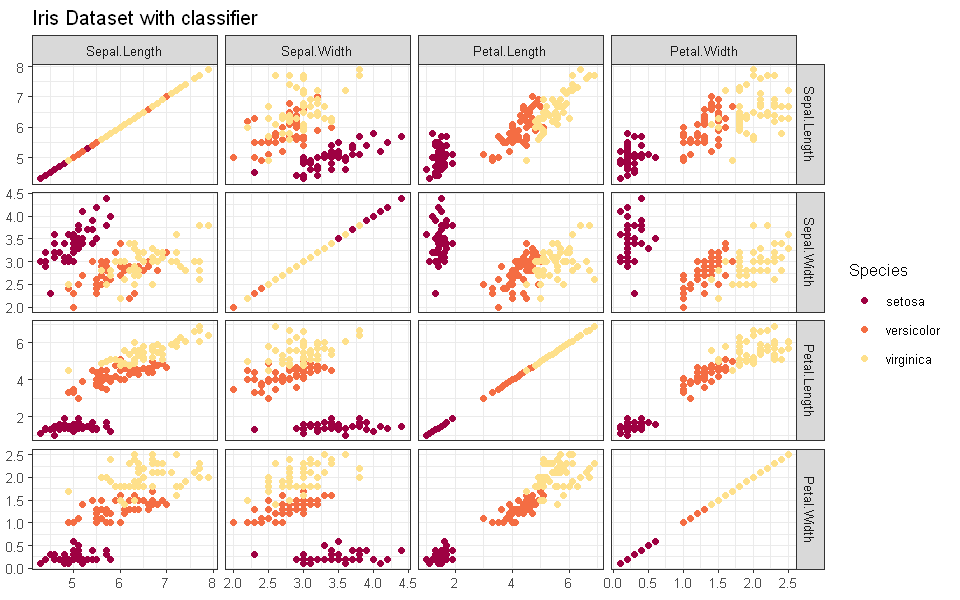

In [33]:
grf <- exp_pair_plot(data=iris, cnames=colnames(iris)[1:4], clabel='Species', title="Iris", colors=mycolors[1:3])

plot_size(8, 5)
grf
plot_size(4, 3)

## Advanced matrix dispersion

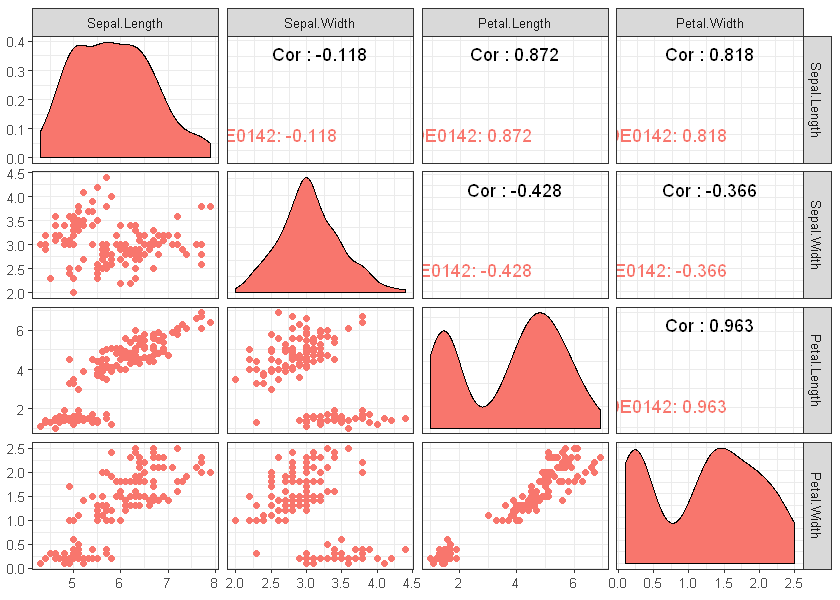

In [14]:
grf <- exp_advpair_plot(data=iris, cnames=colnames(iris)[1:4], title="Iris", colors=mycolors[1])

plot_size(7, 5)
grf
plot_size(4, 3)

## Advanced matrix dispersion with the classifier

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


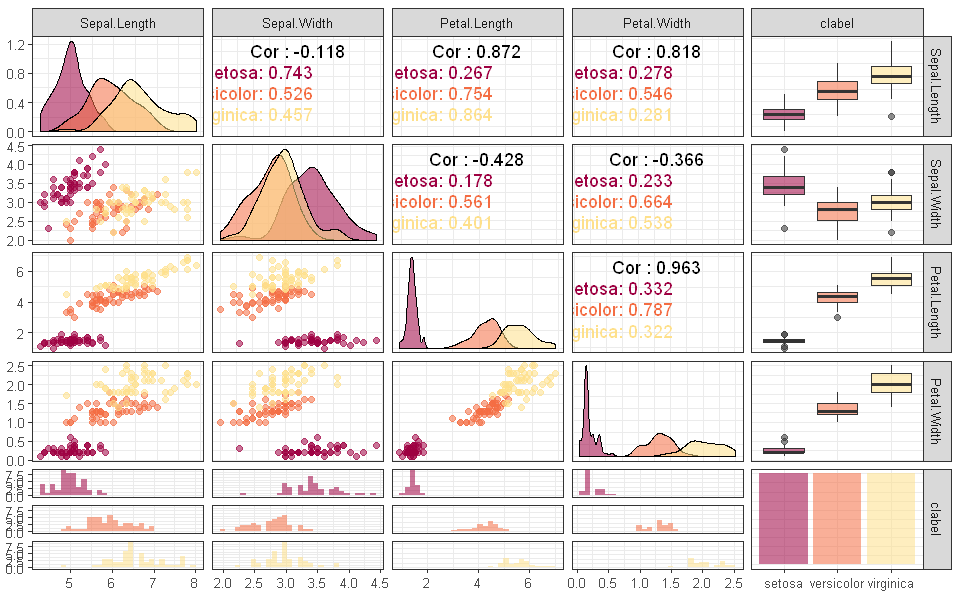

In [32]:
grf <- exp_advpair_plot(data=iris, cnames=colnames(iris)[1:4], title="Iris", clabel='Species', colors=mycolors[1:3])

plot_size(8, 5)
grf
plot_size(4, 3)

## Images

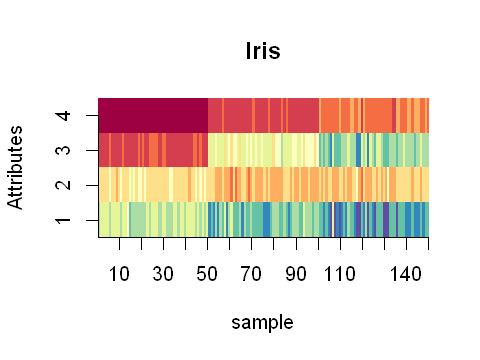

In [42]:
mat <- as.matrix(iris[,1:4])
x <- (1:nrow(mat))
y <- (1:ncol(mat))
image(x, y, mat, col = col.set, axes = FALSE,  main = "Iris", xlab="sample", ylab="Attributes")
axis(2, at = seq(0, ncol(mat), by = 1))
axis(1, at = seq(0, nrow(mat), by = 10))

## Chernoff faces

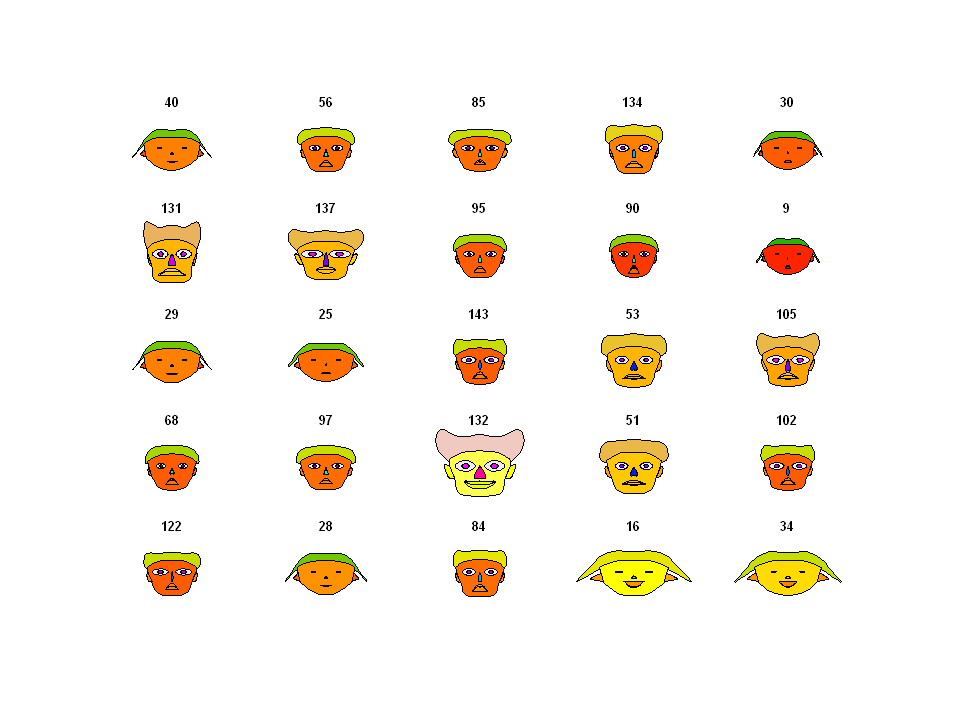

In [37]:
set.seed(1)
sample_rows = sample(1:nrow(iris), 25)

isample = iris[sample_rows,]
labels = as.character(rownames(isample))
isample$Species <- NULL


plot_size(8, 6)
faces(isample, labels = labels, print.info=F, cex=1)
plot_size(4, 3)

## Chernoff faces with the classifier

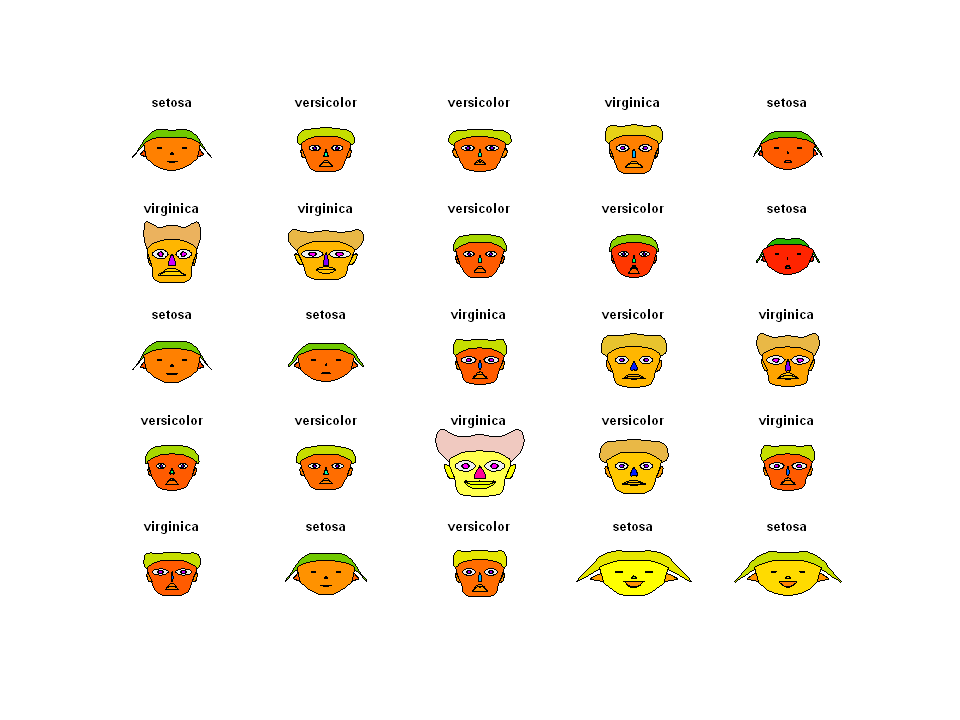

In [38]:
set.seed(1)
sample_rows = sample(1:nrow(iris), 25)

isample = iris[sample_rows,]
labels = as.character(isample$Species)
isample$Species <- NULL

plot_size(8, 6)
faces(isample, labels = labels, print.info=F, cex=1)
plot_size(4, 3)